In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

%matplotlib inline

In [2]:
np.random.seed(1)
tf.set_random_seed(1)

In [3]:
rand_a = np.random.uniform(0, 100, (5,5))
rand_a

array([[  4.17022005e+01,   7.20324493e+01,   1.14374817e-02,
          3.02332573e+01,   1.46755891e+01],
       [  9.23385948e+00,   1.86260211e+01,   3.45560727e+01,
          3.96767474e+01,   5.38816734e+01],
       [  4.19194514e+01,   6.85219500e+01,   2.04452250e+01,
          8.78117436e+01,   2.73875932e+00],
       [  6.70467510e+01,   4.17304802e+01,   5.58689828e+01,
          1.40386939e+01,   1.98101489e+01],
       [  8.00744569e+01,   9.68261576e+01,   3.13424178e+01,
          6.92322616e+01,   8.76389152e+01]])

In [4]:
rand_b = np.random.uniform(0, 100, (5,1))
rand_b

array([[ 89.46066635],
       [  8.50442114],
       [  3.90547832],
       [ 16.98304196],
       [ 87.81425034]])

In [5]:
a = tf.placeholder(tf.float32)
b = tf.placeholder(tf.float32)

In [6]:
add_op = a + b
mul_op = a * b

In [7]:
with tf.Session() as sess:
    add_result = sess.run(add_op, feed_dict={a:rand_a, b:rand_b})
    mul_result = sess.run(mul_op, feed_dict={a:rand_a, b:rand_b})


print(add_result)
print('-'*75)
print(mul_result)

[[ 131.16287231  161.49310303   89.4720993   119.69392395  104.13625336]
 [  17.73828125   27.13044167   43.06049347   48.1811676    62.38609314]
 [  45.8249321    72.4274292    24.35070229   91.71722412    6.64423752]
 [  84.02979279   58.71352386   72.85202789   31.02173615   36.79319   ]
 [ 167.88870239  184.64041138  119.15666199  157.04650879  175.45315552]]
---------------------------------------------------------------------------
[[  3.73070654e+03   6.44407031e+03   1.02320468e+00   2.70468726e+03
    1.31288794e+03]
 [  7.85286255e+01   1.58403519e+02   2.93879395e+02   3.37427765e+02
    4.58232422e+02]
 [  1.63715515e+02   2.67610992e+02   7.98483810e+01   3.42946869e+02
    1.06961651e+01]
 [  1.13865784e+03   7.08710510e+02   9.48825317e+02   2.38419724e+02
    3.36436584e+02]
 [  7.03167822e+03   8.50271582e+03   2.75231079e+03   6.07957910e+03
    7.69594531e+03]]


## Example Neural Network

In [8]:
n_features = 10
n_dense_neurons = 3

In [9]:
x = tf.placeholder(dtype=tf.float32, shape=(None, n_features))
W = tf.Variable(tf.random_normal([n_features,n_dense_neurons]))
b = tf.Variable(tf.ones([n_dense_neurons]))

In [10]:
WX = tf.matmul(x, W)

In [11]:
# z = wx + b
Z = WX + b

In [12]:
a = tf.sigmoid(Z)

In [13]:
init = tf.global_variables_initializer()

In [14]:
with tf.Session() as sess:
    sess.run(init)
    
    layer_out = sess.run(a, feed_dict={x: np.random.random([1, 10])})

In [15]:
layer_out

array([[ 0.9798227 ,  0.01324952,  0.45293   ]], dtype=float32)

## Simple Regression Example

In [16]:
x_data = np.linspace(0,10,10) + np.random.uniform(-1.5, 1.5, 10)
y_label = np.linspace(0,10,10) + np.random.uniform(-1.5, 1.5, 10)

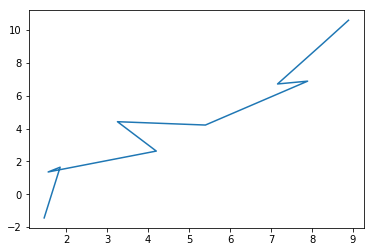

In [17]:
plt.plot(x_data,y_label)

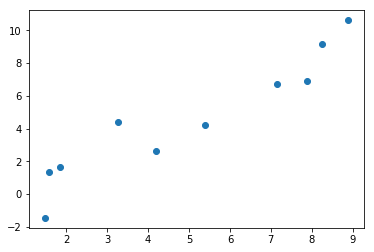

In [18]:
plt.scatter(x_data,y_label)

In [19]:
m = tf.Variable(0.2)
b = tf.Variable(0.2)

In [20]:
error = 0

for x,y in zip(x_data, y_label):
    
    y_hat = m * x + b
    
    error += (y - y_hat) ** 2

In [26]:
optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.00001)
train = optimizer.minimize(error)

In [27]:
init = tf.global_variables_initializer()

In [28]:
with tf.Session() as sess:
    sess.run(init)
    
    training_step = 50000
    
    for i in range(training_step):
        
        sess.run(train)
        
    final_slop, final_intercept = sess.run([m,b])
    
    

In [29]:
final_slop

1.1828921

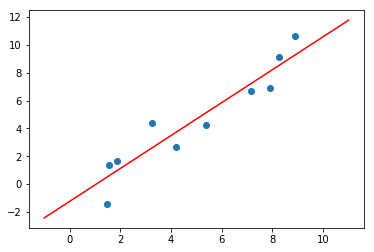

In [30]:
x_test = np.linspace(-1, 11,10)

y_pred_plot = final_slop * x_test + final_intercept

plt.plot(x_test, y_pred_plot, 'r')

plt.scatter(x_data,y_label)